In [6]:
#Importing Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("Big_Mart_Data.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
print("Shape Of Dataset:- ",df.shape)
print("Colums Of Dataset:- ",df.shape[1])
print("Rows Of Dataset:- ",df.shape[0])

Shape Of Dataset:-  (8523, 12)
Colums Of Dataset:-  12
Rows Of Dataset:-  8523


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Data


In [20]:
df.Item_Weight.dtype
#Here Item_Weight is numeric value 
#Filling it with Mean values

dtype('float64')

In [21]:
df['Item_Weight'].mean()

12.857645184135976

In [22]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
df['Outlet_Size'].dtype

dtype('O')

In [108]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [106]:
#Here Object size is Object value 
#Filling it with Mode(Most Frequent Value) values
mode_of_Outlet_Size= df.pivot_table(values='Outlet_Size', 
                                columns='Outlet_Type', 
                                aggfunc=(lambda x: x.mode()[0])
                               )


In [107]:
print(mode_of_Outlet_Size)

Outlet_Type                     Grocery Store Supermarket Type1   
Outlet_Size  [[Small, Small, Medium, Medium]]             Small  \

Outlet_Type Supermarket Type2 Supermarket Type3  
Outlet_Size            Medium            Medium  


In [44]:
missing_values=df['Outlet_Size'].isnull()

In [46]:
#Replacing it with ssing values
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_OutSize)

In [47]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [84]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium             2793
[Grocery Store]    2410
Small              2388
High                932
Name: count, dtype: int64

# Numerical Data Analysis

In [85]:
sns.set()

C:\Users\Kaptaan Saab\AppData\Local\Temp\ipykernel_1184\3291023970.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


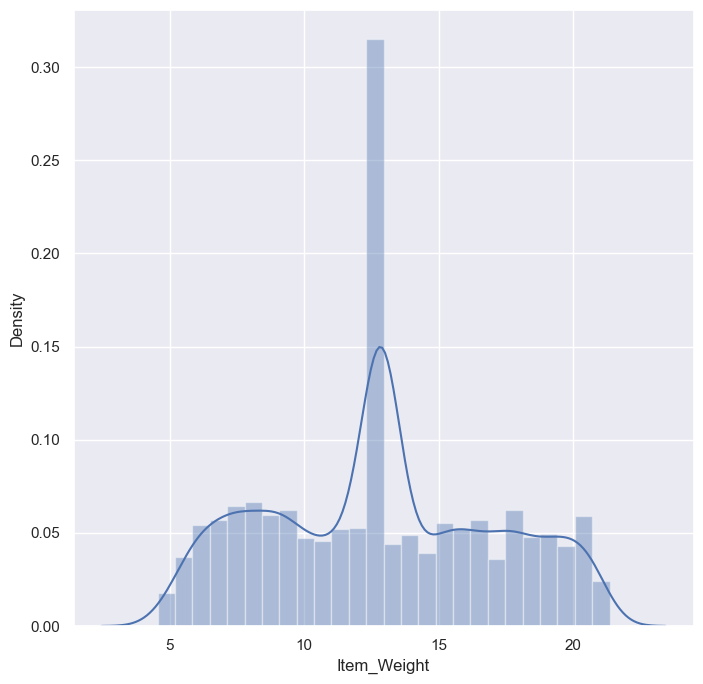

In [86]:
#For Item Weight Data
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\Kaptaan Saab\AppData\Local\Temp\ipykernel_1184\257310537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


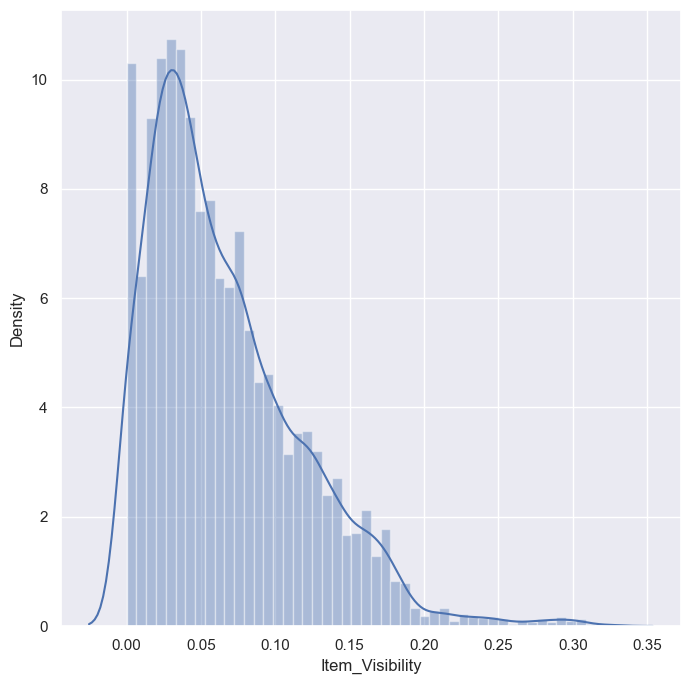

In [87]:
#For Item Visibility Data
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\Users\Kaptaan Saab\AppData\Local\Temp\ipykernel_1184\2821877804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


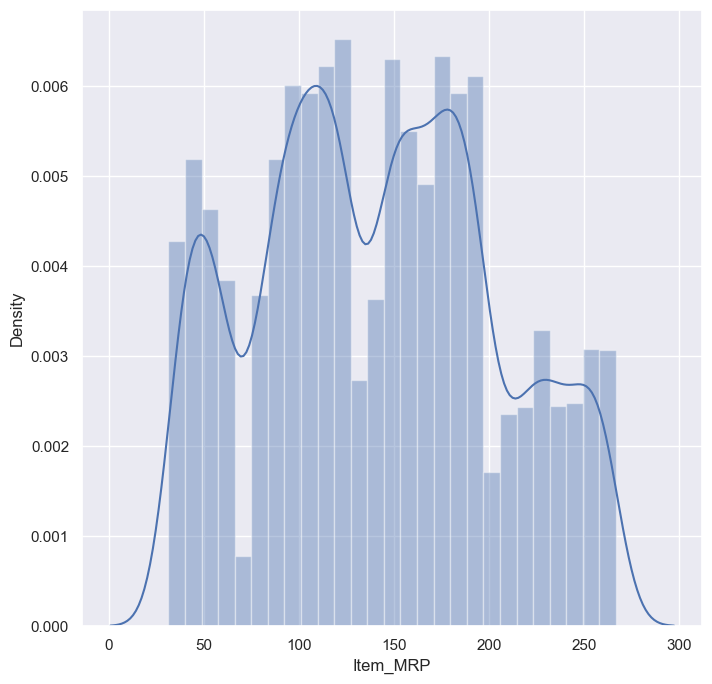

In [88]:
#For Item MRP Data
plt.figure(figsize=(8,8))
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\Kaptaan Saab\AppData\Local\Temp\ipykernel_1184\781520911.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


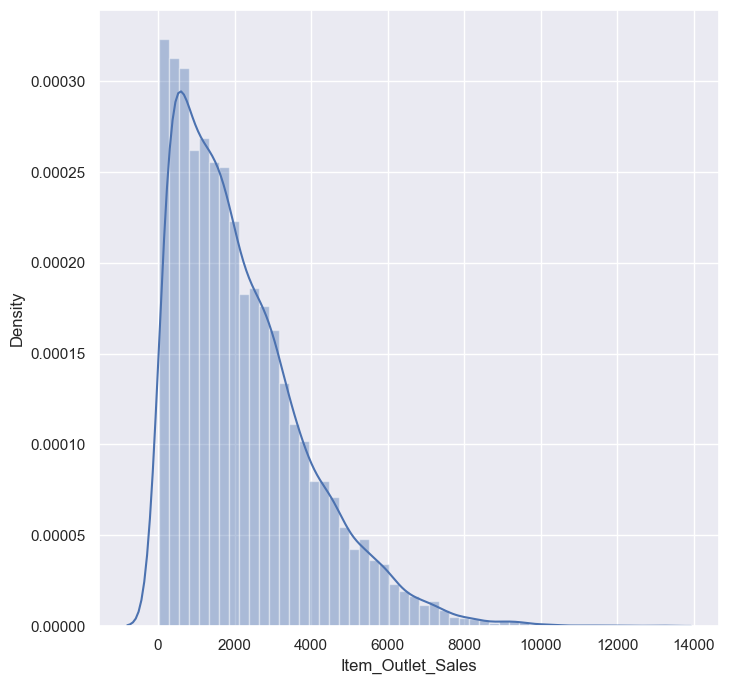

In [89]:
#For Outlet Sales Data
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

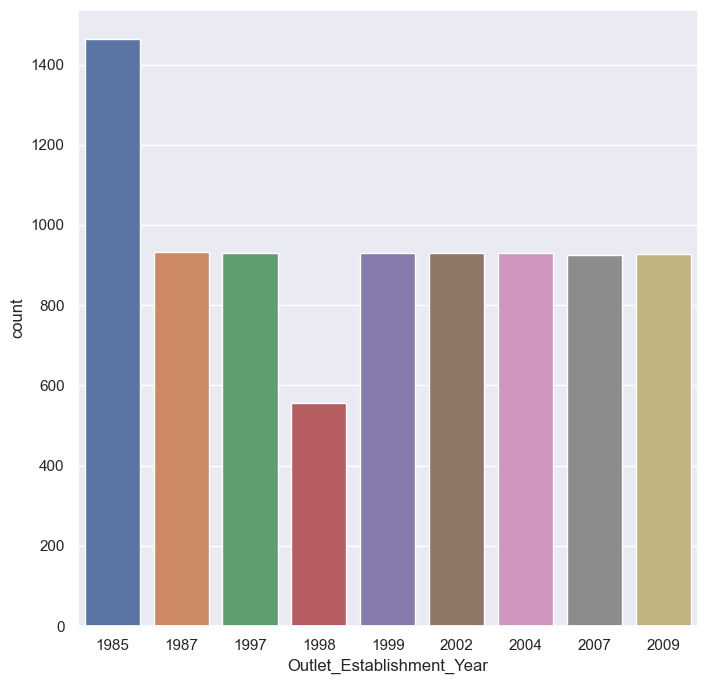

In [90]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Establishment_Year',data=df)

<Axes: xlabel='Item_Type', ylabel='count'>

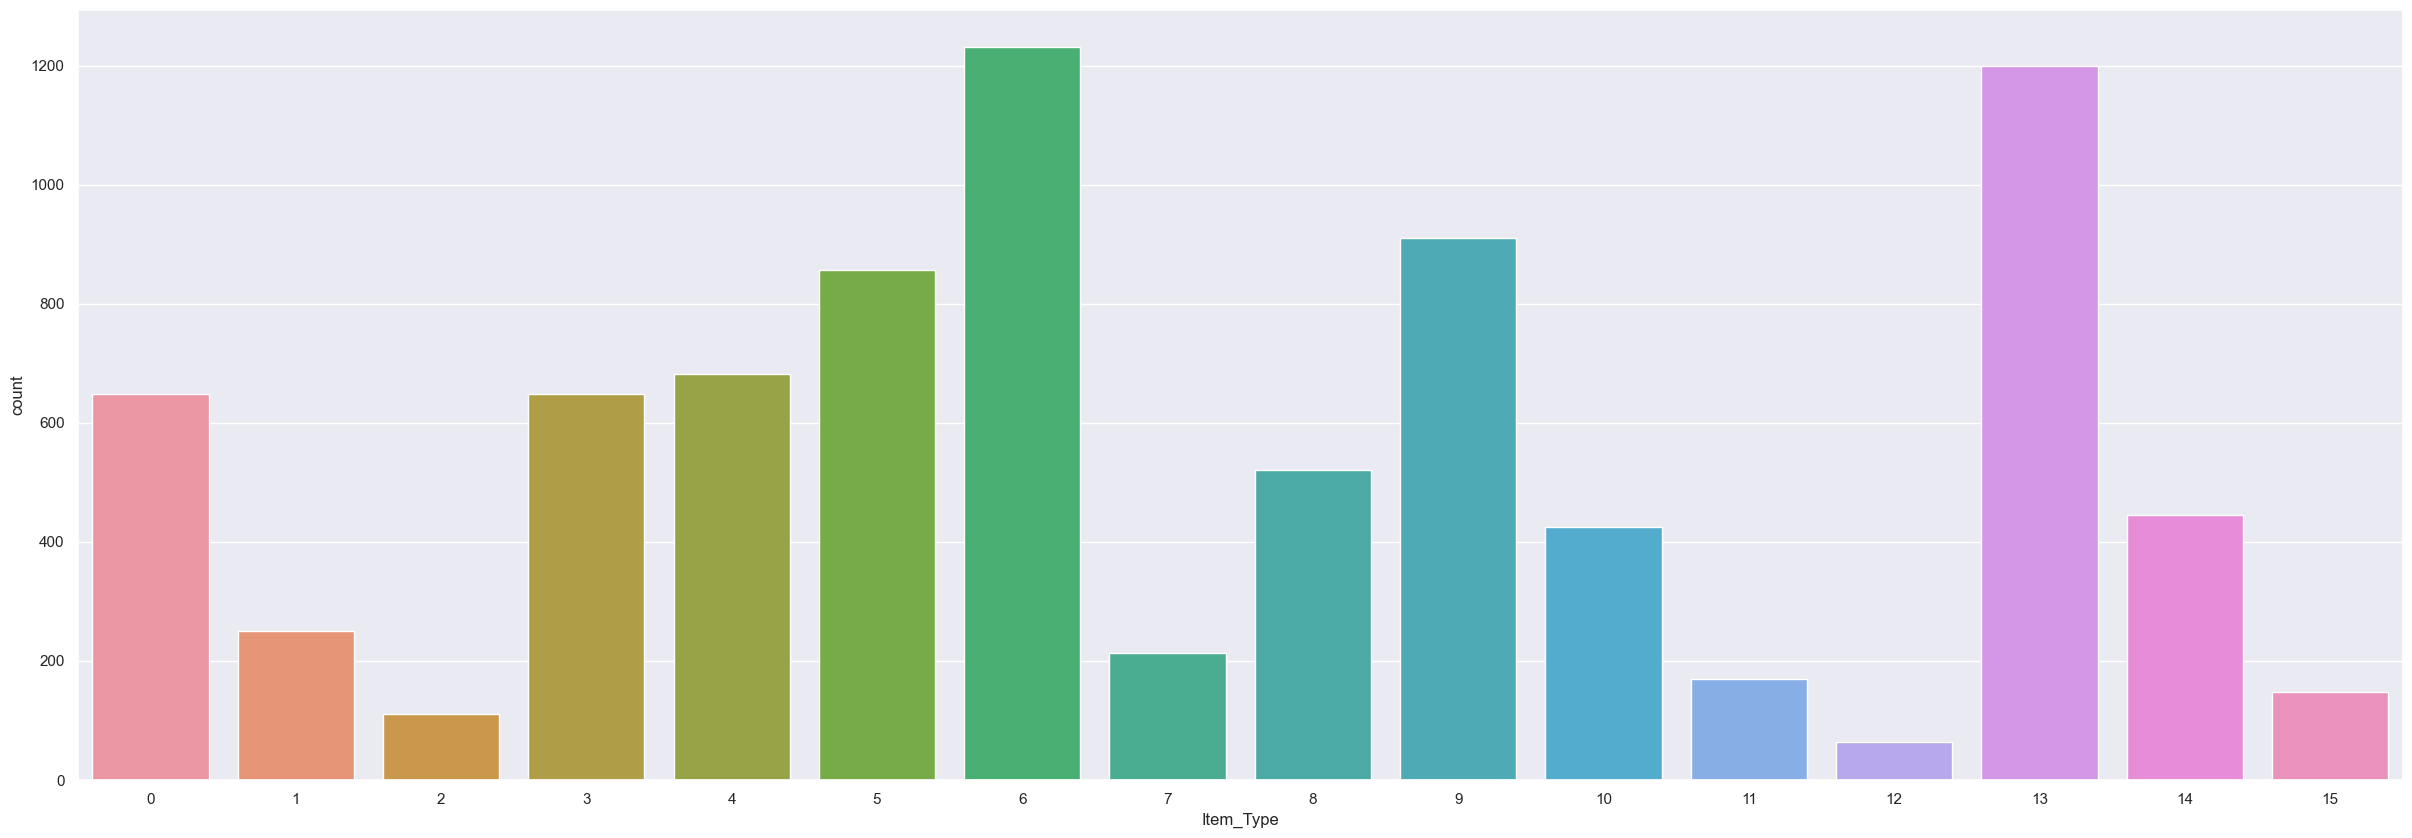

In [91]:
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type',data=df)

In [98]:
#plt.figure(figsize=(8,8))
#sns.countplot(x='Outlet_Size',data=df)

TypeError: unhashable type: 'DataFrame'

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

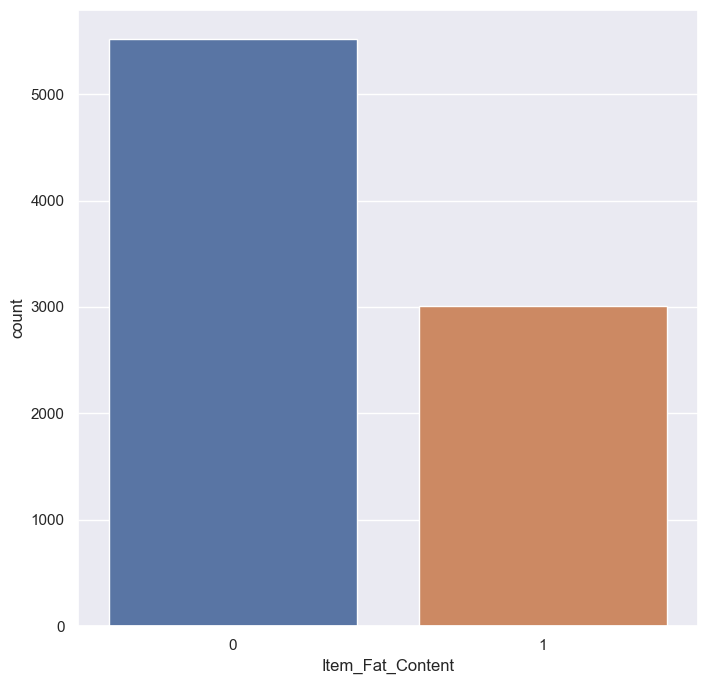

In [92]:
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=df)

In [93]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [94]:
#Replacing all other as Low Fat and reg as Regular
df=df.replace({"Item_Fat_Content":{
                                    'LF':'Low Fat',
                                    'low fat':'Low Fat',
                                    'reg':'Regular',
    
                                }
               }
             )

In [95]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

# Converting Text Data to Numeric by Lable Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE

LabelEncoder()

In [109]:
'''Converting Categorical Columns 
	Item_Identifier
    Item_Fat_Content
    Item_Type
    Outlet_Identifier
    Outlet_Size
    Outlet_Location_Type	
    Outlet_Type
'''
#For Item_Identifier
df['Item_Identifier']=LE.fit_transform(df['Item_Identifier'])

#For Item_Fat_Content
df['Item_Fat_Content']=LE.fit_transform(df['Item_Fat_Content'])

#For Item_Type
df['Item_Type']=LE.fit_transform(df['Item_Type'])

#For Outlet_Identifier 
df['Outlet_Identifier']=LE.fit_transform(df['Outlet_Identifier'])

#For Outlet_Size
#df['Outlet_Size']=LE.fit_transform(df['Outlet_Size'])

#For Outlet_Location_Type
df['Outlet_Location_Type']=LE.fit_transform(df['Outlet_Location_Type'])

#For Outlet_Type 
df['Outlet_Type']=LE.fit_transform(df['Outlet_Type'])

In [110]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


# Train Test Split

In [114]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Outlet_Size','Item_Outlet_Sales'],axis=1)
Y=df['Item_Outlet_Sales']

In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [120]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


# Model Creation

In [121]:
from xgboost import XGBRegressor


In [134]:
model=XGBRegressor(n_estimators=10)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
model.score(X_test,Y_test)

0.5697349283338782

# Evalution

In [138]:
#Training Predictions
training_data_pred=model.predict(X_train)

#Testing Data Predictions
testing_data_pred=model.predict(X_test)

In [141]:
from sklearn import metrics

#R Square Values for training
r2_train=metrics.r2_score(Y_train,training_data_pred)
print("R Square value for Training Data is ",r2_train)

#R Square Values for testing
r2_test=metrics.r2_score(Y_test,testing_data_pred)
print("R Square value for Training Data is ",r2_test)

R Square value for Training Data is  0.6531950314847397
R Square value for Training Data is  0.5697349283338782
